In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
veri = pd.read_csv("olimpiyatlar.csv")
veri.head()

,Unnamed: 0,isim,cinsiyet,yaş,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33682 entries, 0 to 33681
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33682 non-null  int64  
 1   isim        33682 non-null  object 
 2   cinsiyet    33682 non-null  object 
 3   yaş         33682 non-null  float64
 4   boy         33682 non-null  float64
 5   kilo        33682 non-null  float64
 6   takım       33682 non-null  object 
 7   uok         33682 non-null  object 
 8   yil         33682 non-null  int64  
 9   sezon       33682 non-null  object 
 10  sehir       33682 non-null  object 
 11  spor        33682 non-null  object 
 12  etkinlik    33682 non-null  object 
 13  madalya     4664 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.6+ MB


In [ ]:
veri.columns

Index(['Unnamed: 0', 'isim', 'cinsiyet', 'yaş', 'boy', 'kilo', 'takım', 'uok',
       'yil', 'sezon', 'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')

In [ ]:
veri = veri.drop(["Unnamed: 0","cinsiyet"], axis=1)
veri.head()
#veri.drop(["satirismi","satirismi"], axis=1) silinecek satırların ismi

,isim,yaş,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,24.0,178.0,73.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,34.0,182.0,95.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
essiz_etkinlik=pd.unique(veri.spor)
print("etkinlik : {}".format(len(essiz_etkinlik)))


etkinlik : 64


In [ ]:
veri_gecici=veri.copy()
boy_kilo_liste=["boy","kilo"]
for e in essiz_etkinlik: #liste içerisinde dolaş
  etkinlik_filtre=veri_gecici.boy==0
  veri_filtreli=veri_gecici[etkinlik_filtre]
  for s in boy_kilo_liste:
    ortalama=np.round(np.mean(veri_filtreli[s]),2)
    if ~np.isnan(ortalama):
      veri_filtreli[s]= veri_filtreli[s].fillna(ortalama)
    else:
      tum_veri_ort=np.round(np.mean(veri[s]),2)
      veri_filtreli[s]= veri_filtreli[s].fillna(tum_veri_ort)
  #etkinlik özelinde kayıp değerleri doldurulmul olan veriyi veri_geciciye eşitle
  veri_gecici[etkinlik_filtre]=veri_filtreli
#gecici veriyi gerçek veriye eşitle
veri = veri_gecici.copy() #boy ve kilo sütunlarında kayıp değer sayısına bakalım
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33682 entries, 0 to 33681
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      33682 non-null  object 
 1   yaş       33682 non-null  float64
 2   boy       33682 non-null  float64
 3   kilo      33682 non-null  float64
 4   takım     33682 non-null  object 
 5   uok       33682 non-null  object 
 6   yil       33682 non-null  int64  
 7   sezon     33682 non-null  object 
 8   sehir     33682 non-null  object 
 9   spor      33682 non-null  object 
 10  etkinlik  33682 non-null  object 
 11  madalya   4664 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 3.1+ MB


Yaş sütunu için yaş ortalamasına göre kayıp veri doldurma

In [ ]:
yas_ortalamsı=np.round(np.mean(veri.yaş),2)
print("yaş ortalaması: {}".format(yas_ortalamsı))
veri["yaş"]=veri["yaş"].fillna(yas_ortalamsı)
veri.info()

yaş ortalaması: 25.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33682 entries, 0 to 33681
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      33682 non-null  object 
 1   yaş       33682 non-null  float64
 2   boy       33682 non-null  float64
 3   kilo      33682 non-null  float64
 4   takım     33682 non-null  object 
 5   uok       33682 non-null  object 
 6   yil       33682 non-null  int64  
 7   sezon     33682 non-null  object 
 8   sehir     33682 non-null  object 
 9   spor      33682 non-null  object 
 10  etkinlik  33682 non-null  object 
 11  madalya   4664 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 3.1+ MB


madalya alamayan sporcuları veri setinden çıkar

In [ ]:
madalyaDegiskeni=veri["madalya"]
pd.isnull(madalyaDegiskeni).sum()

29018

In [ ]:
madalyaDegiskeniFiltre=~pd.isnull(madalyaDegiskeni)

In [ ]:
veri=veri[madalyaDegiskeniFiltre]
veri.head(5)

,isim,yaş,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,34.0,182.0,95.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,30.0,182.0,76.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,30.0,177.0,75.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,28.0,184.0,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
#veriyi kaydediyoruz
veri.to_csv("olimpiyatlar_temizlenmis.csv",index=False)

histogram grafiklerini çizdireceğimiz fonksiyonu yazıyoruz


In [ ]:
def plotHistogram(degisken):
#  Girdi: Değişken/sutun ismi çıktı: ilgili değişken histogramı
  plt.figure()
  plt.hist(veri[degisken],bins=85,color="orange")
  plt.xlabel(degisken)
  plt.ylabel("frekans")
  plt.title("Veri sıklığı-{}".format(degisken))
  plt.show()

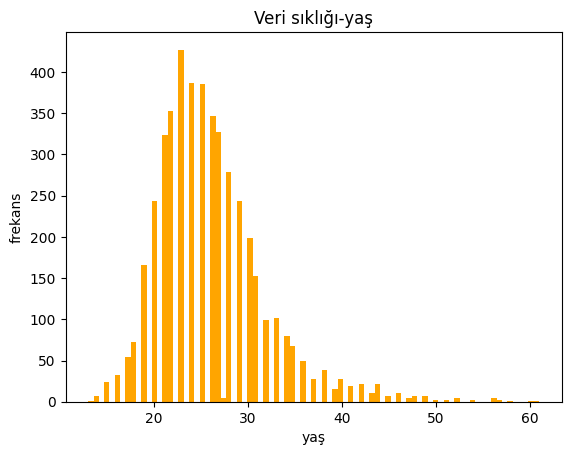

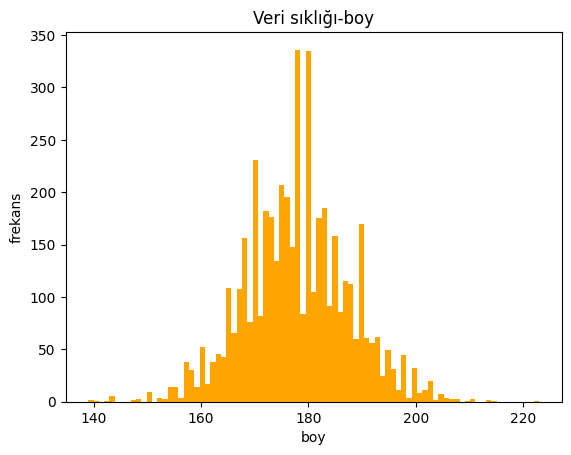

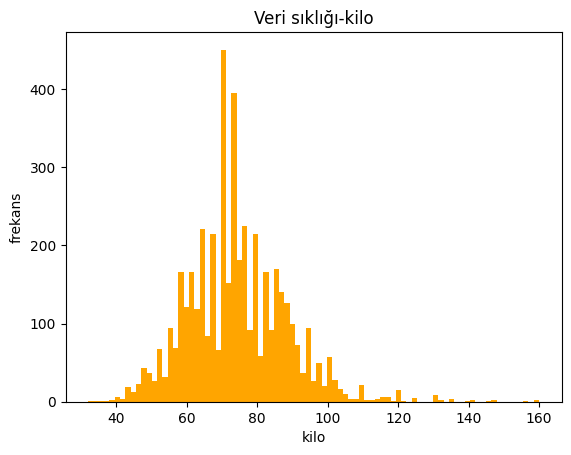

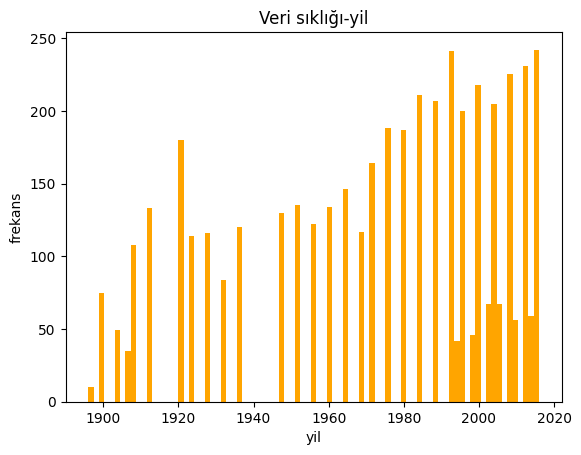

In [ ]:
sayisalDegiskenler=["yaş","boy","kilo","yil"]
for i in sayisalDegiskenler:
  plotHistogram(i)

In [ ]:
veri.describe() #bu fonksiyon sayısal değişkenlerin sayısı ortalaması min. max. değerleri gibi verileri görüntülemek için

,yaş,boy,kilo,yil
count,4664.000000,4664.000000,4664.000000,4664.000000
mean,26.063358,177.935678,74.339408,1972.868782
std,5.801908,9.918310,14.164547,34.006066
min,13.000000,139.000000,32.000000,1896.000000
25%,22.000000,171.500000,65.000000,1952.000000
50%,25.000000,178.000000,73.000000,1980.000000
75%,29.000000,184.000000,83.000000,2000.000000
max,61.000000,223.000000,160.000000,2016.000000


**İki Değişkenli Veri Analizi**
*     Cinsiyete göre boy ve kilo karşılaştırması
*      Sayısal sütunlar arasındaki ilişkinin incelenmesi
*   Madalya ve yaş arasındaki ilişkinin incelenmesi
*   Kazanılan madalyaların hangi şehirlerde kazanıldığı
*    Cinsiyete göre kazanılan altın, gümüş ,bronz madalya sayıları


**CİNSİYETE GÖRE BOY VE KİLO KARŞILAŞTIRMASI**

In [ ]:
erkek= veri[veri.cinsiyet=="M"]
erkek.head(3)

,Unnamed: 0,isim,cinsiyet,yaş,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [ ]:
kadın = veri[veri.cinsiyet=="F"]
kadın.head(3)

,Unnamed: 0,isim,cinsiyet,yaş,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
4,4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


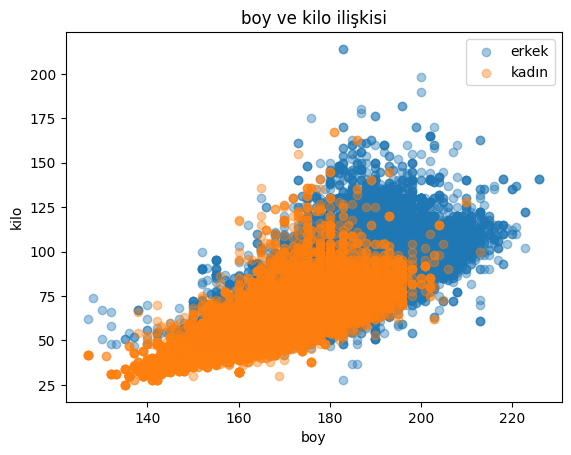

In [ ]:
plt.figure()
plt.scatter(erkek.boy,erkek.kilo,alpha=0.4,label="erkek")
plt.scatter(kadın.boy,kadın.kilo,alpha=0.4,label="kadın")
plt.xlabel("boy")
plt.ylabel("kilo")
plt.title("boy ve kilo ilişkisi")
plt.legend()
plt.show()


**SAYISAL SÜTUNLAR ARASINDAKİ İLİŞKİ İNCELEMESİ**

In [ ]:
veri.loc[:,["yaş","boy","kilo"]].corr() #korelasyon tablosu

,yaş,boy,kilo
yaş,1.000000,0.105497,0.194487
boy,0.105497,1.000000,0.793116
kilo,0.194487,0.793116,1.000000


**MADALYA VE YAŞ ARASINDAKİ İLİŞKİ**

In [ ]:
veri_gecici=veri.copy()
veri_gecici=pd.get_dummies(veri_gecici,columns=['madalya'])
veri_gecici.head(2)

,Unnamed: 0,isim,cinsiyet,yaş,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
0,0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
1,1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0


In [ ]:
veri_gecici.loc[:,["yaş","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yaş,madalya_Bronze,madalya_Gold,madalya_Silver
yaş,1.000000,0.010185,0.011471,0.014502
madalya_Bronze,0.010185,1.000000,-0.051724,-0.051201
madalya_Gold,0.011471,-0.051724,1.000000,-0.051356
madalya_Silver,0.014502,-0.051201,-0.051356,1.000000



*   madalya sayısı ile yaşın bir bağlantısının olmadığını görüyoruz.







**KAZANILAN MADALYALARIN HANGİ ŞEHİRLERDE KAZANILDIĞI**


In [ ]:
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


**CİNSİYETE GÖRE MADALYA SAYILARI**

In [ ]:
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


**PİVOT TABLOSU**

In [ ]:
veri_pivot=veri.pivot_table(index="madalya",columns= "cinsiyet",
                            values=["boy","kilo","yaş"],
                            aggfunc={"boy":np.mean,"kilo":np.mean,"yaş":[min,max,np.std]})
veri_pivot.head()

boy                   kilo              yaş              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.027579  180.149097  62.732564  77.831513  69.0  72.0  12.0   
Gold      170.472645  180.427013  63.159327  78.162545  63.0  64.0  13.0   
Silver    170.257965  180.157286  62.843507  77.943023  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.336322  5.923200  
Gold      13.0  5.251772  6.046314  
Silver    13.0  5.263507  6.166954

**Anomali tespiti ( aykırı değer )**

In [ ]:
def anomaliTespiti (df,ozellik):
  outlier_indices =[]

  for c in ozellik:
    #ilk çeyrek
    Q1=np.percentile(df[c],25)
    #ikinci çeyrek
    Q3=np.percentile(df[c],75)
    #çeyrekler analizi
    IQR=Q3-Q1
    #aykırı değer için ek adım miktarı
    outlier_step=1.5*IQR
    #aykırı değeri ve bulunduğu indeksi tespit edelim (aykırı değer tespiti formülü)
    outlier_list_col = df[(df[c] < Q1-outlier_step) | (df[c]>Q3+outlier_step)].index
    #tespit edilen indexleri depolayalım
    outlier_indices.extend(outlier_list_col)
    #essiz aykırı degerleri bulalım

  outlier_indices = Counter(outlier_indices)
  #eğer bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim
  multiple_outliers = list(i for i,v in outlier_indices.items() if v>1)

  return multiple_outliers

In [ ]:
veri_anomali=veri.loc[anomaliTespiti(veri,["yaş","kilo","boy"])]
veri_anomali.spor.value_counts()

Gymnastics             426
Basketball             391
Athletics              115
Shooting               102
Handball                36
Volleyball              31
Water Polo              31
Judo                    26
Rowing                  24
Sailing                 22
Swimming                18
Wrestling               13
Weightlifting           12
Beach Volleyball         8
Figure Skating           6
Diving                   5
Bobsleigh                4
Canoeing                 4
Ice Hockey               3
Boxing                   3
Tennis                   2
Curling                  1
Tug-Of-War               1
Archery                  1
Luge                     1
Skeleton                 1
Rhythmic Gymnastics      1
Name: spor, dtype: int64

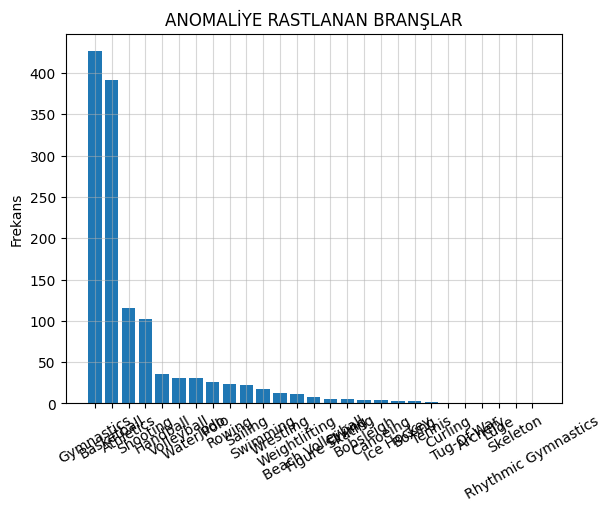

In [ ]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("ANOMALİYE RASTLANAN BRANŞLAR")
plt.ylabel("Frekans")
plt.grid(True,alpha=0.5)
plt.show()


Basketbol branşında görülen anomalinin sebebini araştırıyoruz.

In [ ]:
veri_basketbol=veri_anomali[veri_anomali.spor=="Basketball"]
veri_basketbol

,Unnamed: 0,isim,cinsiyet,yaş,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
178238,178238,Jos Rafael Ortz Rijos,M,40.0,211.0,108.0,Puerto Rico,PUR,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
213325,213325,Oscar Daniel Bezerra Schmidt,M,38.0,205.0,107.0,Brazil,BRA,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,NaN
1186,1186,Kieron Robert Achara,M,29.0,208.0,110.0,Great Britain,GBR,2012,Summer,London,Basketball,Basketball Men's Basketball,NaN
1322,1322,Roberto Acua,M,25.0,208.0,109.0,Argentina,ARG,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN
7693,7693,"Konstantinos ""Dinos"" Angelidis-Khronis",M,27.0,207.0,110.0,Greece,GRE,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270121,270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270444,270444,Zou Yuchen,M,20.0,203.0,107.0,China,CHN,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN
270740,270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze
270741,270741,Eurelijus ukauskas,M,27.0,218.0,115.0,Lithuania,LTU,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze


**  **Zaman serilerinde veri analizi** **

In [ ]:
veri_zaman=veri.copy()


In [ ]:
sirali_array=np.sort(veri_zaman.yil.unique())
sirali_array #(veri_zaman.yil.unique()) eşsiz yılları sıralı hale getirdik

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

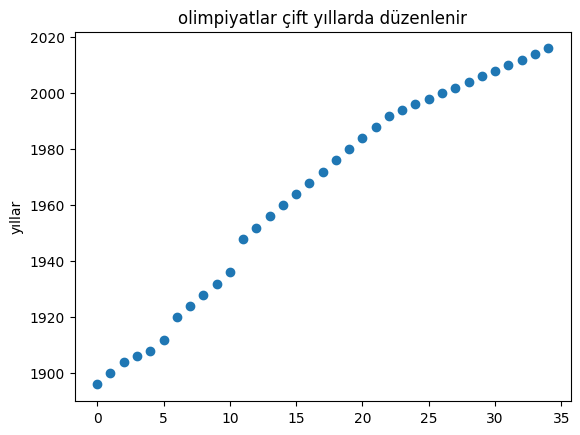

In [ ]:
plt.figure()
plt.scatter(range(len(sirali_array)),sirali_array)
plt.ylabel("yıllar")
plt.title("olimpiyatlar çift yıllarda düzenlenir")
plt.show()

In [ ]:
#veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim
tarih_saat_nesnesi=pd.to_datetime(veri_zaman["yil"],format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


0   1992-01-01
1   2012-01-01
2   1920-01-01
Name: yil, dtype: datetime64[ns]

In [ ]:
veri_zaman["tarih_saat"]=tarih_saat_nesnesi
veri_zaman.head(3)

,Unnamed: 0,isim,cinsiyet,yaş,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
0,0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1992-01-01
1,1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,2012-01-01
2,2,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1920-01-01


In [ ]:
#veri zaman değişkeninin ana indeksini tarih saat değerine güncelleyelim
veri_zaman=veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1,inplace = True) #yıl sütununu sildik
veri_zaman

KeyError: ignored

In [ ]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()
#kayıp verileri çıkaralım
periyodik_veri = periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

,Unnamed: 0,yaş,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,
2008-12-31,1863508744,350020.0,2396762.5,970713.5,710,671,667
2010-12-31,622486078,114999.0,769995.0,311350.5,171,174,175
2012-12-31,1747063321,335421.0,2276804.0,918656.5,679,632,630
2014-12-31,680600832,127104.0,855031.0,344864.5,198,202,197
2016-12-31,1852902884,358734.0,2409235.0,970832.5,703,665,655


In [ ]:
veri_zaman=pd.get_dummies(veri_zaman, columns=['madalya'])
veri_zaman.head(3)

,Unnamed: 0,isim,cinsiyet,yaş,boy,kilo,takım,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,,
1992-01-01,0,A Dijiang,M,24.0,180.0,80.0,China,CHN,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
2012-01-01,1,A Lamusi,M,23.0,170.0,60.0,China,CHN,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
1920-01-01,2,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,Summer,Antwerpen,Football,Football Men's Football,0,0,0


<Figure size 640x480 with 0 Axes>

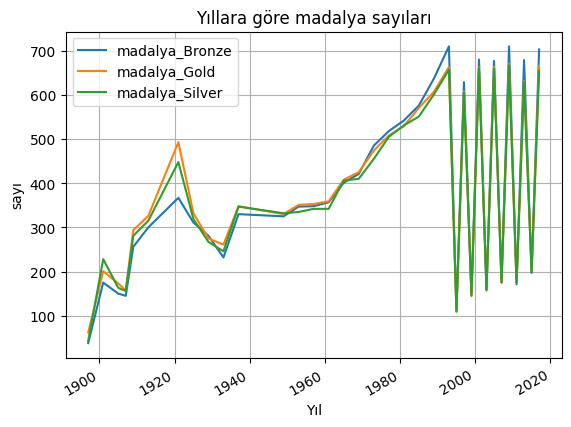

In [ ]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [ ]:
yaz = veri_zaman[veri_zaman.sezon=="Summer"]
kis = veri_zaman[veri_zaman.sezon=="Winter"]
kis.head()

,Unnamed: 0,isim,cinsiyet,yaş,boy,kilo,takım,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,,
1988-01-01,4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0
1988-01-01,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,0,0
1992-01-01,6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,0,0
1992-01-01,7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0,0,0
1994-01-01,8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0,0,0


In [ ]:
periyodik_veri_yaz=yaz.resample("A").sum()
periyodik_veri_yaz=periyodik_veri_yaz[~(periyodik_veri_yaz==0).any(axis=1)] #boş değerleri almıyoruz
periyodik_veri_yaz.head()

,Unnamed: 0,yaş,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,
1896-12-31,53664613,9479.5,66362.5,27173.5,38,62,43
1900-12-31,244671100,55511.5,342932.5,143732.5,175,201,228
1904-12-31,181570294,34524.0,228352.0,93777.5,150,173,163
1906-12-31,243418293,46428.0,306753.5,127830.0,145,157,156
1908-12-31,408927355,83600.0,548199.0,226339.0,256,294,281


<Figure size 640x480 with 0 Axes>

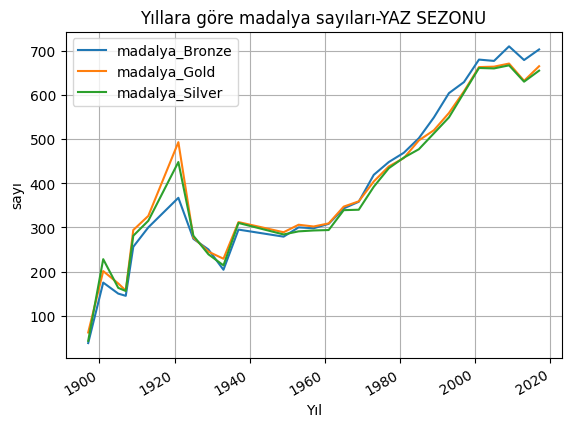

In [ ]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları-YAZ SEZONU")
plt.ylabel("sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()